<a href="https://colab.research.google.com/github/aossmajed/k-NearestNeighbors-KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aoss Majed Sultan Zaid**
#**aossmajed**
#**Link For data:**
https://drive.google.com/drive/folders/1T88ER7z7u7qOT68oSLpuDWxu53-DEb-Q?usp=sharing

 
 


#**OPEN DRIVE**

In [ ]:
from google.colab import drive
import cv2
drive.mount('/content/drive/')
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
#%cd /gdrive

Mounted at /content/drive/


#**CHECK DATA**

In [ ]:
#!unzip '/content/drive/MyDrive/PR_TASK/Smile Detection.zip' -d '/content/drive/MyDrive/PR_TASK'

In [ ]:
import os
try:
    if not os.path.exists(r'/content/drive/MyDrive/PR_TASK/Smile Detection/Smile Detection'):
        os.makedirs(r'/content/drive/MyDrive/PR_TASK/Smile Detection/Smile Detection')
except OSError:
    print ('Error: Creating directory of data')


initial_count = 0
dir = "/content/drive/MyDrive/PR_TASK/Smile Detection/Smile Detection/negatives_No_Smile"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print(initial_count)


initial_count2 = 0
dir = "/content/drive/MyDrive/PR_TASK/Smile Detection/Smile Detection/positives_Smile"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count2 += 1
print(initial_count2)

9475
3690


#**Load  Data**

In [ ]:
import cv2
pos=[]
neg= []
y1=[]
y2=[]
SIZE=256
for i in range(0,initial_count2):
    
    image = cv2.imread(f'/content/drive/MyDrive/PR_TASK/Smile Detection/Smile Detection/positives_Smile/2 ({i+1}).jpg',cv2.IMREAD_GRAYSCALE)
    #image = cv2.resize(image, (SIZE, SIZE)) 
    #gray =cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pos.append(image)
    #print(images)
    y1.append(0)
    print('i :',i+1)

for j in range(0,initial_count):
    
    image2 = cv2.imread(f'/content/drive/MyDrive/PR_TASK/Smile Detection/Smile Detection/negatives_No_Smile/1 ({j+1}).jpg',cv2.IMREAD_GRAYSCALE)
   # image2 = cv2.resize(image2, (SIZE, SIZE)) 
    neg.append(image2)
    y2.append(1)
    print("j :",j+1)



Streaming output truncated to the last 5000 lines.
j : 4476
j : 4477
j : 4478
j : 4479
j : 4480
j : 4481
j : 4482
j : 4483
j : 4484
j : 4485
j : 4486
j : 4487
j : 4488
j : 4489
j : 4490
j : 4491
j : 4492
j : 4493
j : 4494
j : 4495
j : 4496
j : 4497
j : 4498
j : 4499
j : 4500
j : 4501
j : 4502
j : 4503
j : 4504
j : 4505
j : 4506
j : 4507
j : 4508
j : 4509
j : 4510
j : 4511
j : 4512
j : 4513
j : 4514
j : 4515
j : 4516
j : 4517
j : 4518
j : 4519
j : 4520
j : 4521
j : 4522
j : 4523
j : 4524
j : 4525
j : 4526
j : 4527
j : 4528
j : 4529
j : 4530
j : 4531
j : 4532
j : 4533
j : 4534
j : 4535
j : 4536
j : 4537
j : 4538
j : 4539
j : 4540
j : 4541
j : 4542
j : 4543
j : 4544
j : 4545
j : 4546
j : 4547
j : 4548
j : 4549
j : 4550
j : 4551
j : 4552
j : 4553
j : 4554
j : 4555
j : 4556
j : 4557
j : 4558
j : 4559
j : 4560
j : 4561
j : 4562
j : 4563
j : 4564
j : 4565
j : 4566
j : 4567
j : 4568
j : 4569
j : 4570
j : 4571
j : 4572
j : 4573
j : 4574
j : 4575
j : 4576
j : 4577
j : 4578
j : 4579
j : 4580
j : 

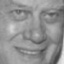

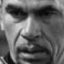

In [ ]:
cv2_imshow(pos[0])
cv2_imshow(neg[0])

In [ ]:
len(pos)
len(neg)
len(y2)

9475

#**Split Data( %80 , %20)**

In [ ]:
#pos
x_tr1= pos[:-738]
x_ts1=pos[2952:]
y_tr1=y1[:-738]
y_ts1=y1[2952:]

print(len(x_tr1))
print(len(x_ts1))
print(len(y_tr1))
print(len(y_ts1))
#neg
x_tr2=neg[:-1895]
x_ts2=neg[7580:]
y_tr2=y2[:-1895]
y_ts2=y2[7580:]

print(len(x_tr2))
print(len(x_ts2))
print(len(y_tr2))
print(len(y_ts2))

2952
738
2952
738
7580
1895
7580
1895


In [ ]:
X_TRAIN=x_tr1+x_tr2
X_TEST=x_ts1+x_ts2

Y_TRAIN = y_tr1+ y_tr2
Y_TEST = y_ts1+ y_ts2

# cv2_imshow(X_TRAIN[2952])
# cv2_imshow(X_TEST[737])
# print(Y_TRAIN[2952])
# print(Y_TEST[738])



#**KNN**

In [ ]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k]
        dist=np.array(dist)
        #print(dist) 
         
        #Labels of the K datapoints from above
        labels=[]
        for i in range(len(dist)):
           labels.append(y[dist[i]])

        #print(labels)
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
        labels.clear()

 
    return op_labels
#Our predict function req

#**Accuracy**

**AT K= 7**

In [ ]:
from sklearn.metrics import accuracy_score
K=7
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
 #Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))

accuracy found is : % 79.0


**AT K= 5**

In [ ]:
from sklearn.metrics import accuracy_score
K=5
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
#Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))

accuracy found is : % 78.0


**AT K= 3**

In [ ]:
from sklearn.metrics import accuracy_score
K=3
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
#Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))


accuracy found is : % 76.0


**AT K= 1**

In [ ]:
from sklearn.metrics import accuracy_score
K=1
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
#Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))


accuracy found is : % 74.0


**AT K= 10**

In [ ]:
from sklearn.metrics import accuracy_score
K=10
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
 #Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))

accuracy found is : % 79.0


**AT K= 8( The best )**

In [ ]:
from sklearn.metrics import accuracy_score
K=8
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
 #Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))

accuracy found is : % 80.0


**AT K= 12**

In [ ]:
from sklearn.metrics import accuracy_score
K=12
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
 #Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))

accuracy found is : % 79.0


**AT K= 6**

In [ ]:
from sklearn.metrics import accuracy_score
K=6
y_pred = predict(X_TRAIN,Y_TRAIN,X_TEST , K)
 #Checking the accuracy
print("accuracy found is : %",np.round(accuracy_score(Y_TEST, y_pred)*100))

accuracy found is : % 78.0
